# Final Project

* Task 1: Implement data load function for fixed length (10 points)
* Task 2: Implement data load function for variable length (25 points)
* Task 3: Implement K-means clustering or any ML algorithms (25
points)
* Task 4: Visualize clustering or hidden representation of ML algorithm
results (20 points)
* Task 5: Summarize visualization results (20 points)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn #G, D architecture 정의

import os # python 빌트인 os 라이브러리 import 및 파일 위치 확인
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

%matplotlib inline
import numpy as np  #행렬처리 파이썬 라이브러리
import tensorflow as tf

import matplotlib.pyplot as plt #matlab
from warnings import filterwarnings
filterwarnings('ignore')

`1203_빅데이터보안.ipynb` 파일에서는 10개의 파일만 시범적으로 불러와서 테스트 해봄.

여기서는 전체 모든 파일들을 다 불러와서 작업해볼 것!

**학습 데이터셋 불러오기**

* pdf 파일 11219개

In [3]:
import glob

file_list = sorted(glob.glob('/content/drive/MyDrive/21-2빅데이터보안/data/*.csv'))

print(len(file_list))

11219


In [4]:
path = '/content/drive/MyDrive/21-2빅데이터보안/data'

#file_label에 파일명(label) 리스트 추가
#graph_data_sample 폴더에 있는 파일들의 파일명(label)을 file_labels에 추가
file_list = os.listdir(path)
file_labels = [file for file in file_list]

print(file_labels)

Y = []

for i in range(len(file_list)):
  if file_list[i].startswith('0'):
    Y.append('0')
  else:
    Y.append('1')
  
print(Y)
print(len(Y))

['1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__0a0c774887529fd6c90eef179cf82dc94beaaaa2.pdf .csv', '1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__b37442b0af7081d4bb977553023051eb694707b0.pdf .csv', '1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__184080d9b8b5444fee4e582b144e403d5fd3e6d1.pdf .csv', '1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__6d44679dd37b9bb1b4d284497086f5bb1ef49888.pdf .csv', '1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__298d74329a0aa0dae7ebdea8dd4518e7702e1d07.pdf .csv', '1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__cf5162f5017d2a39c563c142ce35762d6ffd74a5.pdf .csv', '1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sample__c84a52b2315f394fd99f9fa7146883ae8e21bde7.pdf .csv', '1_.__cache-mal__home__cuckoo__gptest__dataset__mal_contagio__malicious_sam

In [5]:
print(len(file_list))
print(len(file_labels))

11220
11220


In [ ]:
#data 폴더의 11219개의 파일 모두 가지고 옴
#file_label에 대한 리스트 만들었으니 이젠 file 자체에 대한 2차원 array를 만들어보자
files = []
f_files = []

for i in range(998):
    # files.append(np.loadtxt(path+'/'+file_labels[i], skiprows=1, delimiter=",", dtype='int32'))
    # 1행의 string형의 label들을 받아야하나? str 형태로 출력되는데 이걸 int 등으로 바꿔줘야 하나? 
    # 생각해보니 skiprow로 첫번째 행들을 다 날려버림.. 이래도 되나? 일단 킵 고잉
    a = pd.read_csv(path+'/'+file_labels[i], encoding='utf-8')
    a_2d = a.to_numpy()
    #a_2d = np.loadtxt(path+'/'+file_labels[i], skiprows=1, delimiter=",")
    a_1d = a_2d.flatten()
    files.append(a_1d)
    print(i)
    f_files = np.concatenate((f_files,a_1d), axis=None)

'''

'''

for i in range(1000,len(file_list)):
    # files.append(np.loadtxt(path+'/'+file_labels[i], skiprows=1, delimiter=",", dtype='int32'))
    # 1행의 string형의 label들을 받아야하나? str 형태로 출력되는데 이걸 int 등으로 바꿔줘야 하나? 
    # 생각해보니 skiprow로 첫번째 행들을 다 날려버림.. 이래도 되나? 일단 킵 고잉
    a = pd.read_csv(path+'/'+file_labels[i], encoding='utf-8')
    a_2d = a.to_numpy()
    #a_2d = np.loadtxt(path+'/'+file_labels[i], skiprows=1, delimiter=",")
    a_1d = a_2d.flatten()
    files.append(a_1d)
    print(i)
    f_files = np.concatenate((f_files,a_1d), axis=None)


print(files)
print(len(files))
print(f_files)
print(len(f_files))
#print(file_labels)
#file이라는 큰 배열 안에 10개 각 파일들을 2d numpy array 형태로 업로드 완료
#다음 작업은? 이 2d들을 1d로 바꿔보자

In [39]:
print(len(files))
print(len(f_files))

11218
80733022


In [6]:
Y = []

for i in range(len(file_list)):
  if file_list[i].startswith('0'):
    Y.append('0')
  else:
    Y.append('1')

In [7]:
print(Y)
print(len(Y))

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',

In [6]:
#data 폴더의 11219개의 파일 모두 가지고 옴
#file_label에 대한 리스트 만들었으니 이젠 file 자체에 대한 2차원 array를 만들어보자
files = []
f_files = []

for i in range(500):
    # files.append(np.loadtxt(path+'/'+file_labels[i], skiprows=1, delimiter=",", dtype='int32'))
    # 1행의 string형의 label들을 받아야하나? str 형태로 출력되는데 이걸 int 등으로 바꿔줘야 하나? 
    # 생각해보니 skiprow로 첫번째 행들을 다 날려버림.. 이래도 되나? 일단 킵 고잉
    a = pd.read_csv(path+'/'+file_labels[i], encoding='utf-8')
    a_2d = a.to_numpy()
    #a_2d = np.loadtxt(path+'/'+file_labels[i], skiprows=1, delimiter=",")
    a_1d = a_2d.flatten()
    files.append(a_1d)
    print(i)
    #f_files = np.concatenate((f_files,a_1d), axis=None)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
print(len(files))
print(len(f_files))

500
2335093


In [8]:
from keras.preprocessing.sequence import pad_sequences
from keras import backend as K

padded_files = pad_sequences(files, value=-1)

print(padded_files)

padded_files.shape

[[-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]
 ...
 [-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]
 [-1 -1 -1 ...  0  0  0]]


(500, 248004)

In [10]:
Y = []

for i in range(500):
  if file_list[i].startswith('0'):
    Y.append('0')
  else:
    Y.append('1')

In [11]:
print(Y)
print(len(Y))

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',

In [56]:
type(Y)
Y = np.array(Y)

In [57]:
from sklearn.datasets import make_blobs
import pandas as pd #data processing
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential,Model
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [58]:
print(type(files))

X = np.array(padded_files)

print(type(X))
print(X.shape)

<class 'list'>
<class 'numpy.ndarray'>
(500, 248004)


In [59]:
# data=pd.read_csv('train 2.csv')
# datas=pd.DataFrame(data.iloc[:,0:])
# data.columns=list(data.iloc[:,0:].columns)
# datas['class']=data['class']
# data_drop=datas.drop('class',axis=1)
# Y=datas['class']#.map({'M":1, "B":0})

# print(X)
# print('\n\n')
# print(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state=99)

clfSVC=Sequential()
clfSVC=SVC(gamma='auto')
clfSVC.fit(x_train, y_train)
predictSVC = clfSVC.predict(x_test)
scoreSVC = accuracy_score(y_test, predictSVC)
print('svm prediction score: %s' % scoreSVC)

svm prediction score: 0.98


In [60]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2,random_state=0,learning_rate=100)
# X_2d=tsne.fit_transform(X)

n_components = 2
tsne = TSNE(n_components=n_components)

X_2d = tsne.fit_transform(X)

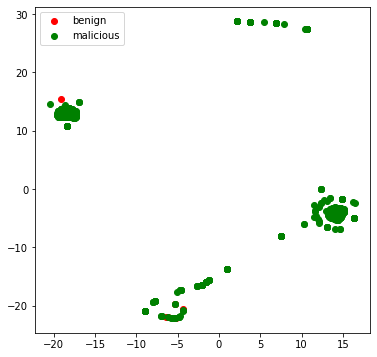

In [62]:
plt.figure(figsize=(6,6))

colors = 'r', 'g'

for i, c, label in zip(['0','1'], ['r','g'], ['benign', 'malicious']):
  plt.scatter(X_2d[Y==i, 0], X_2d[Y==i, 1], c=c, label=label)

plt.legend()
plt.show()

In [48]:
# prin
# t(X_2d)
type(X_2d)
X_2d.shape

(500, 2)





0 b benign
-1
-1
[]




1 r malicious
-1
-1
[]


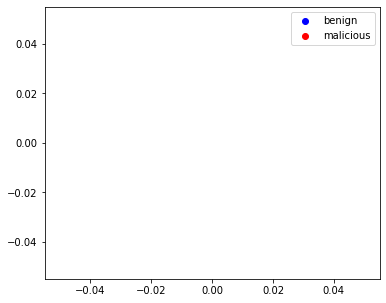

In [44]:
plt.figure(figsize=(6, 5))
# target_ids=range(0,2)

for i,c,l in zip([0,1],['b','r'],['benign','malicious']):

  print('\n\n\n')
  print(i,c,l)
  print(X[1,0])
  print(X[1,1])

  print(X[Y==1,0])
  plt.scatter(X[Y==i,0],X[Y==i,1],c=c,label=l)
  ## X_2d는 numpy.ndarray
  ## x: X_2d의 Y==0 r, 0 c, y: X_2d의 Y==0 r,1 c
  ## x: X_2d의 Y==1 r, 0 c, y: X_2d의 Y==1 r,1 c 

  
plt.legend()
plt.show()